Dataset Link: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset

In [11]:
!pip install kaggle -q

# Importing the Dependencies

In [12]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Collection

In [13]:
kaggle_config = json.load(open('/content/kaggle (1).json'))

In [14]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [15]:
# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [16]:
# loadig the dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
!ls

'kaggle (1).json'   spotify-million-song-dataset.zip
 sample_data	    spotify_millsongdata.csv


In [18]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [19]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("/content/spotify_millsongdata.csv")

Initial Understanding

In [20]:
df.shape

(57650, 4)

In [21]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [23]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [24]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Alabama             187
Reba Mcentire       187
Cher                187
Loretta Lynn        187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [25]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [26]:
df.shape

(10000, 3)

In [27]:
df.head()

,artist,song,text
0,Bee Gees,Fight,No matter how long it takes \r\nNo mater how ...
1,Evanescence,Tourniquet,I tried to kill the pain \r\nBut only brought...
2,Oasis,D'yer Wanna Be A Spaceman,I haven't seen your face round \r\nSince I wa...
3,Alabama,Down On The River,"Down on the river, it's an easy kind of life ..."
4,Michael Bolton,For You,Well it hurt enough \r\nWhen you told me you ...


In [28]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

WordCloud to visualize the most common words in the lyrics.

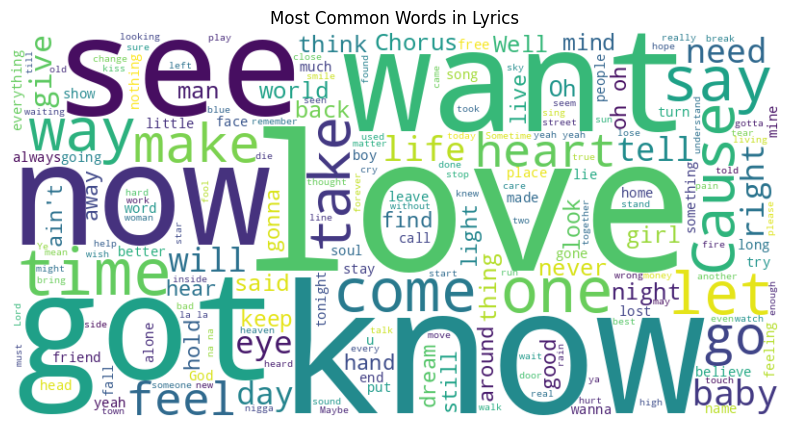

In [29]:

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

Data Preprocessing

In [30]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
stop_words = set(stopwords.words('english'))

In [32]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [33]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [34]:
df.head()

,artist,song,text,cleaned_text
0,Bee Gees,Fight,No matter how long it takes \r\nNo mater how ...,matter long takes mater long matter long takes...
1,Evanescence,Tourniquet,I tried to kill the pain \r\nBut only brought...,tried kill pain brought much lay dying im pour...
2,Oasis,D'yer Wanna Be A Spaceman,I haven't seen your face round \r\nSince I wa...,havent seen face round since kid bringing back...
3,Alabama,Down On The River,"Down on the river, it's an easy kind of life ...",river easy kind life everybody heres feeling f...
4,Michael Bolton,For You,Well it hurt enough \r\nWhen you told me you ...,well hurt enough told leaving go break heart t...


In [35]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [36]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [37]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [38]:
df["song"][2]

"D'yer Wanna Be A Spaceman"

In [39]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("D'yer Wanna Be A Spaceman") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
                   artist                        song
6994  Stone Temple Pilots                  Revolution
6467            Scorpions               Hold Me Tight
9056          Ray Charles                It's Alright
9359                 Kiss         Any Way You Want It
7752          The Killers  Everything Will Be Alright
